In [82]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [83]:
df = pd.read_csv("census.csv")
income = df["income"]
features = df.drop("income", axis = 1)
features.columns


Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

preprocessing
- removing invalid or missing entries
- normalizing
- scaling 
- one-hot encoding



Transforming skewed features
we visually inspect the real valued features histogram to check for anamolies.  

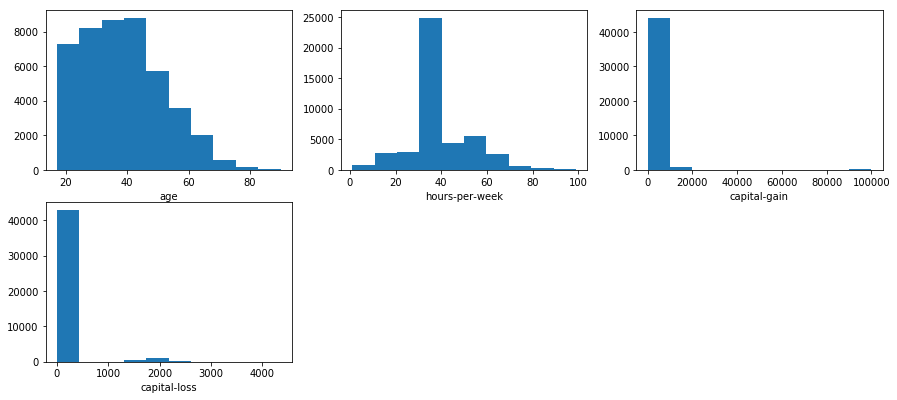

In [84]:
columns = ['age', 'hours-per-week','capital-gain', 'capital-loss']
plt.figure(figsize= (15, 10))
for i,feat in enumerate(columns):
    plt.subplot(3,3, i+1)
    plt.hist(df[feat])
    plt.xlabel(feat)

from above plots, we can see that two features "capital-gain" and "capital-loss" have skewed distributions. Most of therir datapoints are centered around 1 and a few of them are at extereme points. 


To reduce the range of the data and outliers, we apply a logarithmic transformation on skewed features. 

In [85]:
skewed_features = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features)
features_log_transformed[skewed_features] = features[skewed_features].apply(lambda x: np.log(x + 1))

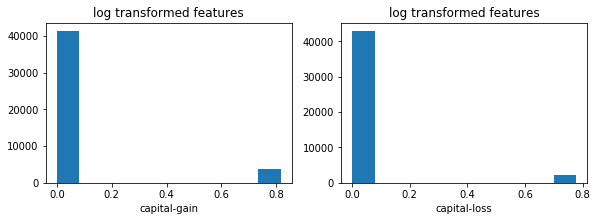

In [86]:
skewed_features = ['capital-gain', 'capital-loss']
plt.figure(figsize= (15, 10))
for i,feat in enumerate(skewed_features):
    plt.subplot(3,3, i+1)
    plt.hist(features_log_transformed_df[feat])
    plt.xlabel(feat)
    plt.title("log transformed features")

now the range and standard deviation for two features is much reduced

### scaling numerical features to a range
it is often good practice to perform some type of scaling on numerical features. Scaling does not change the shape of feature's distribution, it ensures that each feature is treated equally.

In [87]:
from sklearn.preprocessing import MinMaxScaler
# instantiate an scaler , fit it to the data
scaler = MinMaxScaler()
numerical_features = ['age', 'education-num','capital-gain', 'capital-loss', 'hours-per-week']
features_log_min_max_transformed = pd.DataFrame(data = features_log_transformed)
features_log_min_max_transformed[numerical_features] = scaler.fit_transform(features_log_transformed[numerical_features])

one-hot encoding categorical features

In [90]:
categorical_features = ['workclass', 'education_level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

